In [2]:
!pip install kaggle


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [4]:
api = KaggleApi()

In [5]:
api.authenticate()

In [6]:
api.dataset_download_file('fedesoriano/heart-failure-prediction','heart.csv',path='data/')

False

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/heart.csv',)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [5]:
map_chest = {'TA': 'Typical Angina', 'ATA': 'Atypical Angina', 'NAP': 'Non-Anginal Pain', 'ASY': 'Asymptomatic'}
data['ChestPainType'] = data['ChestPainType'].map(map_chest)

In [6]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,Atypical Angina,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,Non-Anginal Pain,160,180,0,Normal,156,N,1.0,Flat,1


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
cat_feature = 'Sex'
target_col = 'HeartDisease'

<Figure size 800x600 with 0 Axes>

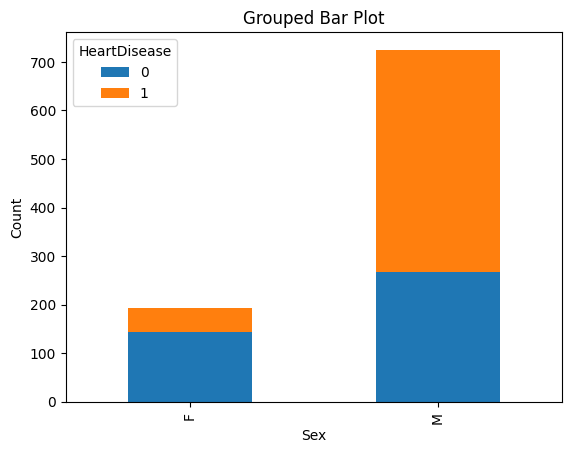

In [9]:
plt.figure(figsize=(8, 6))
data.groupby([cat_feature, target_col]).size().unstack().plot(kind='bar', stacked=True)
plt.title('Grouped Bar Plot')
plt.xlabel(cat_feature)
plt.ylabel('Count')
plt.show()

In [10]:
cat_features = list(data.dtypes[data.dtypes=='object'].to_dict().keys())
target_col = 'HeartDisease'

<Axes: xlabel='ST_Slope'>

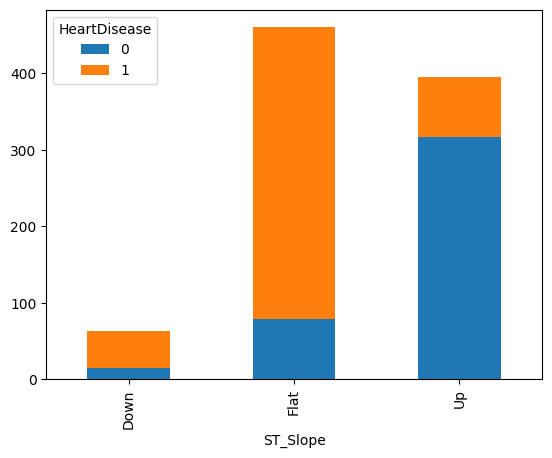

In [11]:
data.groupby(['ST_Slope', 'HeartDisease']).size().unstack().plot(kind='bar', stacked=True)

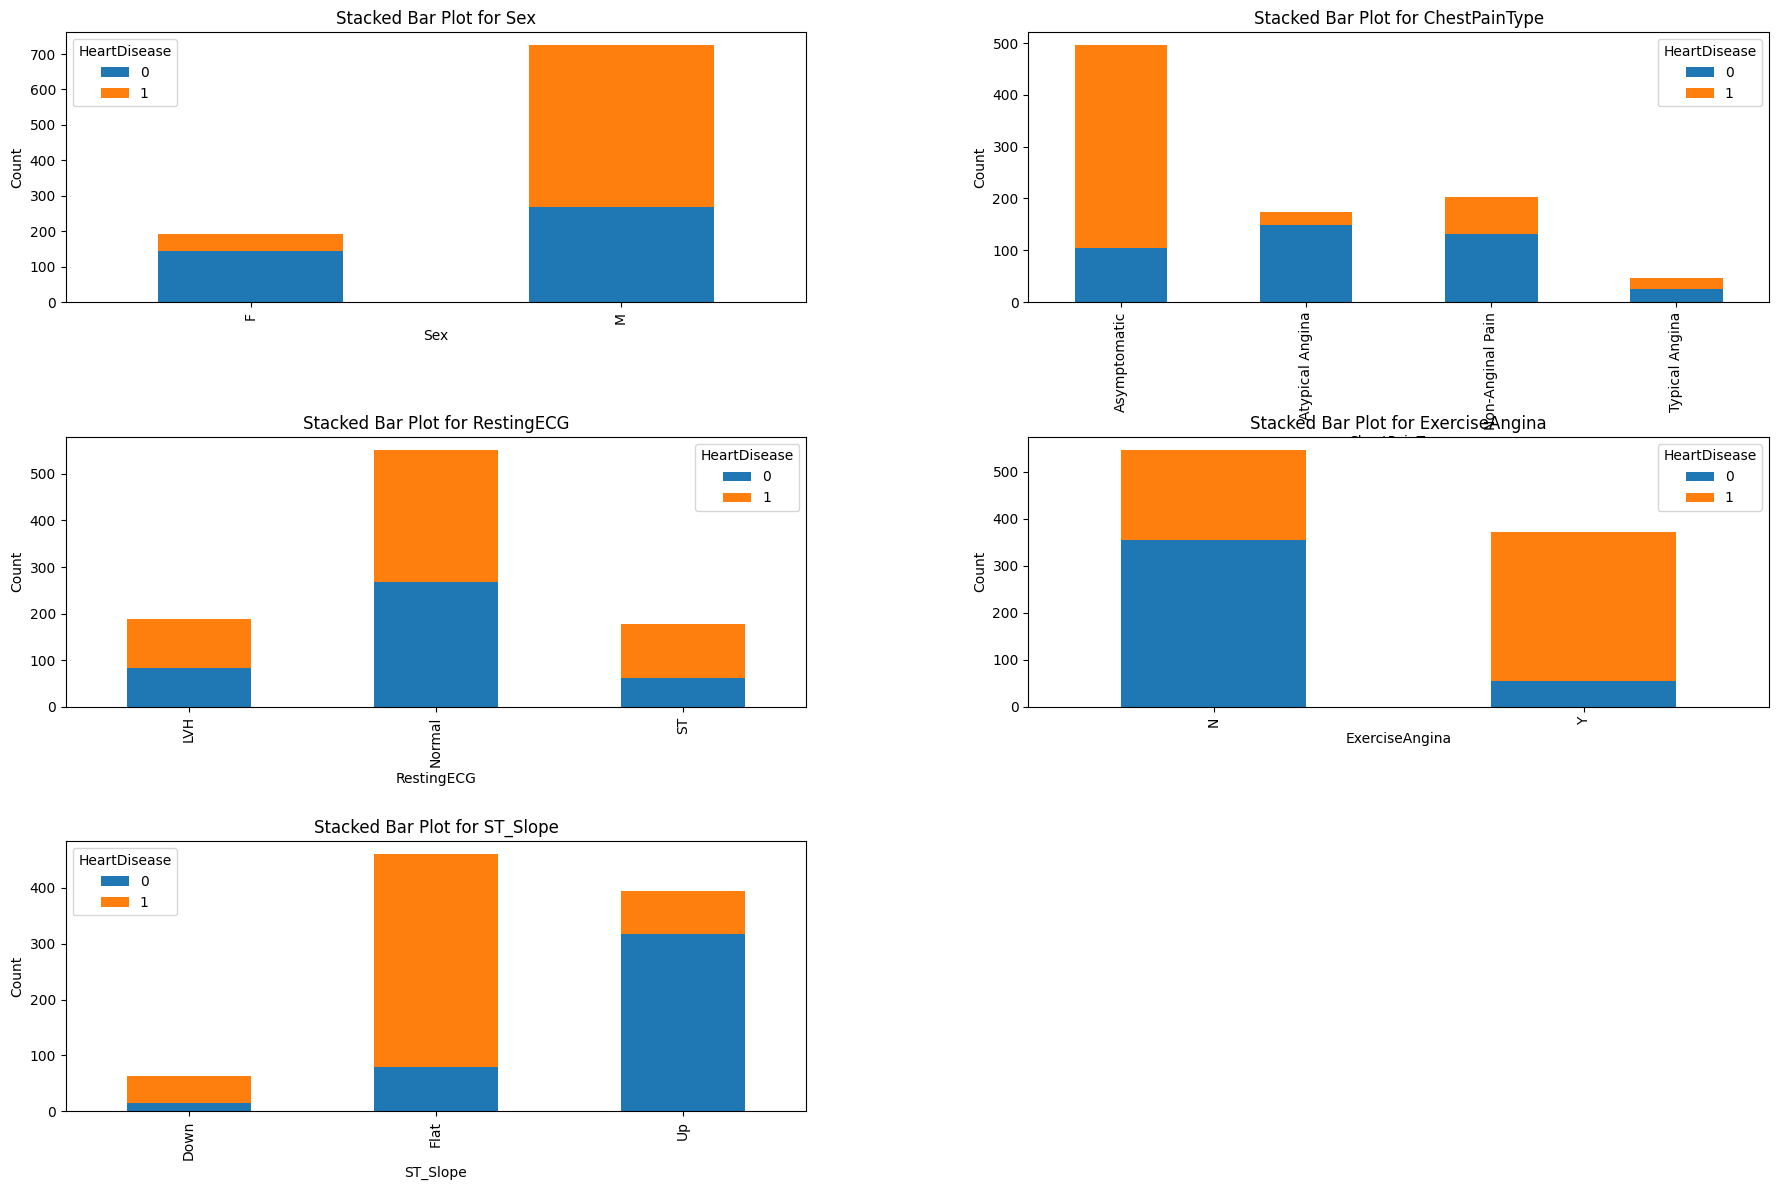

In [12]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

# Flatten the subplots into a 1D array for easier indexing
axes = axes.ravel()

# Loop over each categorical feature and create a stacked bar plot
for i, feature in enumerate(cat_features):
    # Group the data by the feature and the target column
    grouped_data = data.groupby([feature, target_col]).size().unstack()
    
    # Create the stacked bar plot
    grouped_data.plot(kind='bar', stacked=True, ax=axes[i])
    
    # Set the title and axis labels
    axes[i].set_title(f'Stacked Bar Plot for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    
fig.tight_layout(h_pad=20.0)
# Remove any unused subplots
for j in range(len(cat_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Display the plot
plt.show()


- #### Stacked bar plot for Sex
    Based on the data provided, it appears that there is a significant association between sex and heart disease. Specifically, the data shows that out of the total 918 individuals in the sample, 318 (34.6%) had heart disease. When we break this down by sex, we can see that there were 193 females and 725 males in the sample. Among the females, 50 (25.9%) had heart disease, while among the males, 458 (63.2%) had heart disease. This suggests that males are much more likely to have heart disease than females.

    It's worth noting that this analysis is based on a relatively small sample size, and so we should be cautious about drawing broad conclusions from it.
    
- #### Stacked bar plot for ChestPainType
    The graph suggests that there is a relationship between ChestPainType and HeartDisease. Specifically, the data shows that certain types of ChestPain are associated with a higher risk of HeartDisease, while other types are associated with a lower risk. Asymptomatic and Non-Anginal Pain appear to be associated with a higher risk of HeartDisease, as the number of patients is much higher than the number of non-patients for both types of ChestPain. Atypical Angina, on the other hand, appears to be associated with a lower risk of HeartDisease, as the number of non-patients is much higher than the number of patients. Finally, for Typical Angina, there are very few patients, with only 20 patients and 26 non-patients. However, it is important to note that this data only shows the count of patients and non-patients for each type of ChestPain, and further analysis would be needed to determine the strength and direction of the relationship, as well as any potential confounding factors.<br />
Here is a brief explanation of each type of ChestPain:

1. Asymptomatic: This type of ChestPain refers to the absence of any apparent symptoms of ChestPain or discomfort in the chest area. In the context of HeartDisease, Asymptomatic patients are those who do not report any chest pain or discomfort, even if they have other symptoms or risk factors for HeartDisease.

2. Atypical Angina: Atypical Angina refers to chest pain or discomfort that is different from the typical chest pain experienced in Angina. Typically, Angina pain is described as a tightness or pressure in the chest, which may radiate to the arms, neck, jaw, shoulders, or back. Atypical Angina may present with other symptoms such as shortness of breath, nausea, or dizziness.

3. Non-Anginal Pain: Non-Anginal ChestPain refers to chest pain or discomfort that is not related to Angina or HeartDisease. The pain may be caused by other factors such as gastrointestinal problems, musculoskeletal issues, or anxiety.

4. Typical Angina: This type of ChestPain refers to the typical chest pain experienced in Angina. As mentioned earlier, typical Angina pain is described as a tightness or pressure in the chest, which may radiate to other areas.

- #### Stacked bar plot for RestingECG
    The plot suggests that there is a relationship between RestingECG and HeartDisease. The Normal type of RestingECG has the highest count of both HeartDisease patients and non-patients. The LVH (Left Ventricular Hypertrophy) type of RestingECG has a higher number of HeartDisease patients than non-patients, while the ST (ST-T wave abnormality) type of RestingECG has a higher number of HeartDisease patients than non-patients.

    The plot also indicates that the majority of the observations in the dataset have a Normal RestingECG. Further analysis would be necessary to determine the strength and direction of the relationship between RestingECG and HeartDisease, as well as any potential confounding factors.
    
- #### Stacked bar plot for Exercise Angina
    The given plot shows the count of HeartDisease patients and non-patients for each category of the ExerciseAngina feature. ExerciseAngina is a binary categorical feature that indicates whether the patient experiences angina during exercise (Y for yes and N for no), and HeartDisease is the binary target classification.

    From the given plot, it appears that patients who experience angina during exercise are at a higher risk of HeartDisease, as there are more patients in the Y category than the N category. Specifically, there are 192 patients with HeartDisease in the Y category, compared to only 55 non-patients. In contrast, for the N category, there are 355 non-patients and 0 patients. 

    It is important to note that this analysis is based solely on the given data, and further analysis may be necessary to determine the strength and direction of the relationship between ExerciseAngina and HeartDisease, as well as any potential confounding factors. Additionally, the data only provides counts, and other statistical measures, such as proportions or percentages, may provide more informative insights into the relationship between ExerciseAngina and HeartDisease.
    
- #### Stacked bar plot for ST_Slope
    The given data shows the count of HeartDisease patients and non-patients for each category of the ST_Slope feature. ST_Slope is a categorical feature that describes the slope of the ST segment during exercise relative to rest, and HeartDisease is the binary target classification.

    From the given data, it appears that there is a relationship between ST_Slope and HeartDisease. Specifically, patients with a Flat ST_Slope appear to be at a higher risk of HeartDisease, as there are more patients in the Flat category than in the other two categories. There are 381 patients with HeartDisease in the Flat category, compared to 79 patients in the Up category and 49 patients in the Down category.

    Additionally, patients with a Down ST_Slope appear to be at a lower risk of HeartDisease, as there are more non-patients in the Down category than in the other two categories. There are 14 non-patients in the Down category, compared to 317 non-patients in the Up category and 79 non-patients in the Flat category.

    It is important to note that this analysis is based solely on the given data, and further analysis may be necessary to determine the strength and direction of the relationship between ST_Slope and HeartDisease, as well as any potential confounding factors. Additionally, the data only provides counts, and other statistical measures, such as proportions or percentages, may provide more informative insights into the relationship between ST_Slope and HeartDisease.



In [13]:
data.groupby(['ST_Slope', target_col]).size()

ST_Slope  HeartDisease
Down      0                14
          1                49
Flat      0                79
          1               381
Up        0               317
          1                78
dtype: int64

<Figure size 800x600 with 0 Axes>

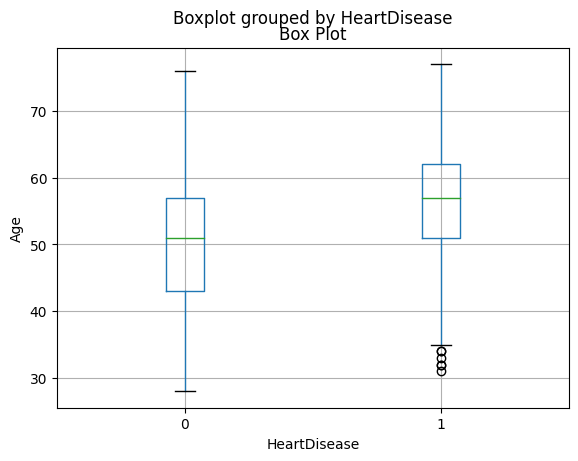

In [14]:
# Define the categorical feature and target column
cat_feature = 'HeartDisease'
target_col = 'Age'

# Create a box plot
plt.figure(figsize=(8, 6))
data.boxplot(column=target_col, by=cat_feature)
plt.title('Box Plot')
plt.xlabel(cat_feature)
plt.ylabel(target_col)
plt.show()

From the boxplot data, we can see that individuals with heart disease tend to be older on average than those without heart disease, as the mean age for class 1 is higher than that of class 0. The standard deviation of age is similar between the two classes, but the maximum age for class 1 is slightly higher than that of class 0. Overall, this boxplot suggests that age may be an important factor in predicting heart disease, as individuals with heart disease tend to be older on average

<Figure size 800x600 with 0 Axes>

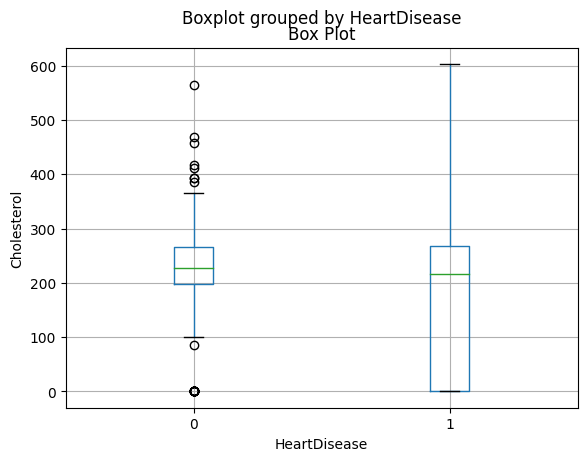

In [15]:
# Define the categorical feature and target column
cat_feature = 'HeartDisease'
target_col = 'Cholesterol'

# Create a box plot
plt.figure(figsize=(8, 6))
data.boxplot(column=target_col, by=cat_feature)
plt.title('Box Plot')
plt.xlabel(cat_feature)
plt.ylabel(target_col)
plt.show()

From the box plot we can see that, on average, individuals with heart disease have lower cholesterol levels compared to those without heart disease. The standard deviation of cholesterol levels is also higher among those without heart disease, indicating greater variability in cholesterol levels in this group. The minimum and maximum cholesterol levels are also higher among those without heart disease.

<Figure size 800x600 with 0 Axes>

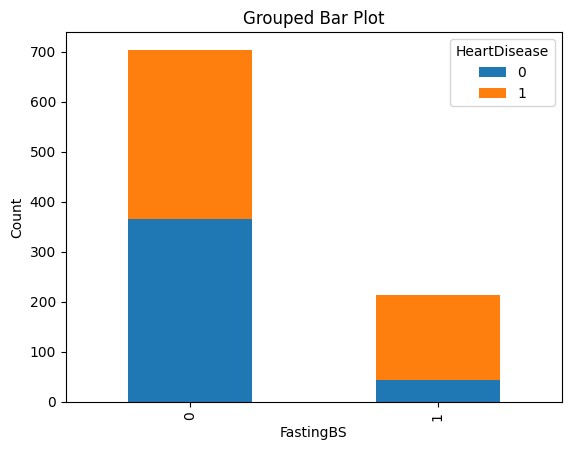

In [16]:
cat_feature = 'FastingBS'
target_col = 'HeartDisease'
plt.figure(figsize=(8, 6))
data.groupby([cat_feature, target_col]).size().unstack().plot(kind='bar', stacked=True)
plt.title('Grouped Bar Plot')
plt.xlabel(cat_feature)
plt.ylabel('Count')
plt.show()

#### Stacked Bar Plot For Fasting Blood Sugar Test
- 0 means the test result is less than 120 mg/dl
- 1 means the test result is greater than 120 mg/dl

From the plot we can see that we have more patient with Fasting blood sugar level greater than 120 mg/dl than non-patient, this may also be an important indicator of heart failure

<Figure size 800x600 with 0 Axes>

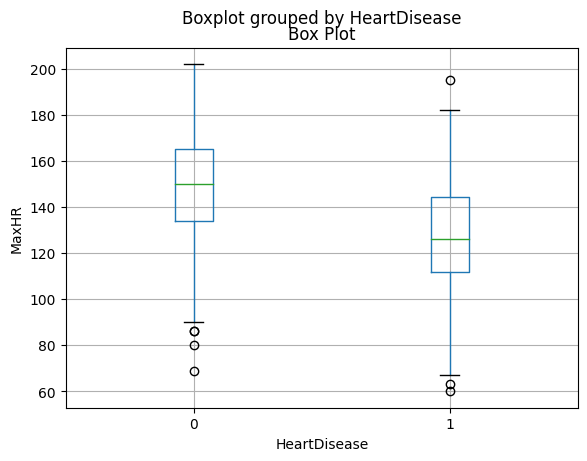

In [17]:
# Define the categorical feature and target column
cat_feature = 'HeartDisease'
target_col = 'MaxHR'

# Create a box plot
plt.figure(figsize=(8, 6))
data.boxplot(column=target_col, by=cat_feature)
plt.title('Box Plot')
plt.xlabel(cat_feature)
plt.ylabel(target_col)
plt.show()

In [18]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,Atypical Angina,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,Non-Anginal Pain,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,Atypical Angina,130,283,0,ST,98,N,0.0,Up,0
3,48,F,Asymptomatic,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,Non-Anginal Pain,150,195,0,Normal,122,N,0.0,Up,0


In [19]:
X = data[data.columns[:-1]]
y_df = data[data.columns[-1]]

In [20]:
x_df = pd.get_dummies(X,columns=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope'],drop_first=True)

In [21]:
x_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_Atypical Angina,ChestPainType_Non-Anginal Pain,ChestPainType_Typical Angina,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,1,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,1,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,0,0,0,0,0,1,0,1,1,0
4,54,150,195,122,0.0,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,1,0,0,1,0,1,0,0,1,0
914,68,144,193,141,3.4,1,0,0,0,1,1,0,0,1,0
915,57,130,131,115,1.2,1,0,0,0,0,1,0,1,1,0
916,57,130,236,174,0.0,0,1,0,0,0,0,0,0,1,0


In [22]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [23]:
X_train,X_test,y_train,y_test = train_test_split(x_df,y_df,test_size=0.2,random_state=11,stratify=y_df)

In [24]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [25]:
lr = LogisticRegression(C=0.91)
lr.fit(x_train_scaled,y_train)

LogisticRegression(C=0.91)

In [26]:
lr.score(x_train_scaled,y_train)

0.8637602179836512

In [27]:
lr.score(x_test_scaled,y_test)

0.875

## Using Sklearn Pipeline

In [28]:
pipe_lr = make_pipeline(StandardScaler(),LogisticRegression(C=1.0))

In [29]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [30]:
pipe_lr.score(X_train,y_train)

0.8637602179836512

In [31]:
pipe_lr.score(X_test,y_test)

0.875

In [32]:
from sklearn.svm import SVC

In [33]:
pipe_svc = make_pipeline(StandardScaler(),SVC())

In [34]:
c_vals = np.arange(0.0,1,0.01)[1:]

In [35]:
c_vals

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
train_score = []
test_score = []
for C in c_vals:
    pipe_svc['svc'].C = C
    pipe_svc.fit(x_train_scaled,y_train)
    train_score.append(pipe_svc.score(x_train_scaled,y_train))
    test_score.append(pipe_svc.score(x_test_scaled,y_test))

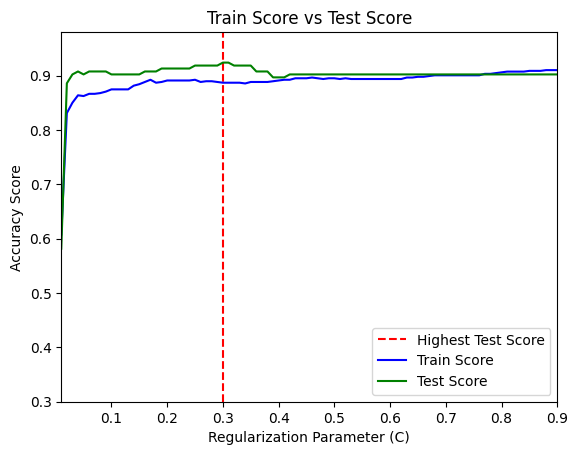

In [38]:
import matplotlib.pyplot as plt

# Add a vertical line to show the highest test error
highest_test_error_index = test_score.index(max(test_score))
plt.axvline(x=c_vals[highest_test_error_index], linestyle='--', color='red', label='Highest Test Score')

plt.plot(c_vals,train_score, label='Train Score', color='blue')
plt.plot(c_vals,test_score, label='Test Score', color='green')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy Score')
plt.title('Train Score vs Test Score')
plt.ylim([0.3,0.98])
plt.xlim([.01,.9])
plt.legend()
plt.show()

In [39]:
max(test_score)

0.9239130434782609

In [40]:
test_score[highest_test_error_index]

0.9239130434782609

In [41]:
train_score[highest_test_error_index]

0.8869209809264306

## Best regularization parameter that gives optimal performance for the support vector machine

In [42]:
c_vals[highest_test_error_index]

0.3

### Resetting the regularization parameter C of the svc pipeline 

In [43]:
train_score = []
test_score = []
for C in c_vals:
    pipe_svc['svc'].C = C
    train_score.append(np.mean(cross_val_score(estimator=pipe_svc,X=x_train_scaled,y=y_train,scoring='accuracy',cv=5,n_jobs=-1)))

In [44]:
train_score.index(max(train_score))

44

In [45]:
train_score[44]

0.8692106979778214

In [46]:
c_vals[44]

0.45

In [47]:
pipe_svc = make_pipeline(StandardScaler(),SVC(C=0.3))
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=0.3))])

In [48]:
pipe_svc.score(X_train,y_train)

0.8869209809264306

In [49]:
pipe_svc.score(X_test,y_test)

0.9239130434782609

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
confmat = confusion_matrix(y_test,pipe_svc.predict(X_test))

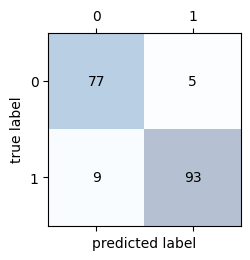

In [52]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In heart failure diagnosis, we are more concerned about the detection of diseases in order to help a patient with the appropriate treatment

TPR(True Positive Rate) provides useful information about the fraction of positive (or relevant) samples that were correctly identified out of the total pool of positives (P).In our case,the fraction of heart disease occurence that were correctly identified out of the total pool of heart disease cases in the dataset

In [53]:
confmat[0,1]

5

In [54]:
# Basis - Taking class 1 as our positive class(Heart disease occurence) and class 0 as our Negative class(No heart disease)
tpr = confmat[1,1]/(confmat[1,1]+confmat[1,0])

In [55]:
print(f'True Positive Rate: {tpr}')

True Positive Rate: 0.9117647058823529


Using Recall as a metric for validation in this case will enhance the model's ability to recall cases of heart disease in the dataset. 
Note: Recall is also called True Positive Rate

In [56]:
precision = confmat[1,1]/(confmat[1,1]+confmat[0,1])

In [57]:
print(f'Precision: {precision}')

Precision: 0.9489795918367347


Using sklearn Metrics

In [58]:
from sklearn.metrics import precision_score,recall_score,f1_score,make_scorer

In [59]:
precision_score(y_test,pipe_svc.predict(X_test))

0.9489795918367347

In [60]:
recall_score(y_test,pipe_svc.predict(X_test))

0.9117647058823529

The combination of precision and recall gives the F1 scorw

In [61]:
f1_score = 2 * (precision*tpr/(precision+tpr))

In [62]:
print(f'F1 score: {f1_score}')

F1 score: 0.9300000000000002


In [63]:
scores = cross_val_score(estimator=pipe_svc,X=X_train,y=y_train,scoring='accuracy',cv=10,n_jobs=-1)

In [64]:
np.mean(scores)

0.8609218807848944

In [65]:
from sklearn.model_selection import validation_curve

In [66]:
c_vals

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [67]:
train_score,test_scores = validation_curve(estimator=pipe_svc,X=X_train,y=y_train,
                                          param_name='svc__C',param_range=c_vals,cv=10,scoring='precision',n_jobs=-1,)

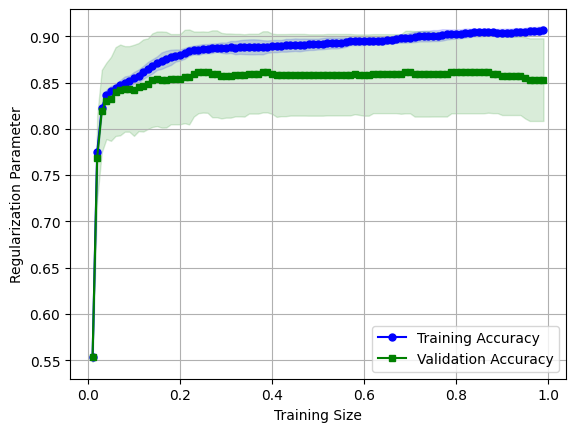

In [68]:
train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.plot(c_vals,train_mean,color='blue',label='Training Accuracy',marker='o',markersize=5)
plt.fill_between(c_vals,train_mean+train_std,train_mean-train_std,color='blue',alpha=0.15)
plt.plot(c_vals,test_mean,color='green',label='Validation Accuracy',marker='s',markersize=5)
plt.fill_between(c_vals,test_mean+test_std,test_mean-test_std,color='green',alpha=0.15)

plt.grid()
plt.xlabel('Training Size')
plt.ylabel('Regularization Parameter')
# plt.ylim([0.6,])
plt.legend(loc='lower right')

In [69]:
print('The Best Regularization Parameter(C): %.3f ' %c_vals[test_mean.argmax()])
print('The Model Performance: %.3f ' %test_mean[test_mean.argmax()])

The Best Regularization Parameter(C): 0.380 
The Model Performance: 0.862 


In [70]:
pipe_svc = make_pipeline(StandardScaler(),SVC(C=0.38))

In [71]:
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=0.38))])

In [72]:
pipe_svc.score(X_train,y_train)

0.888283378746594

In [73]:
pipe_svc.score(X_test,y_test)

0.907608695652174

#### Plot of Receiver Operating Graph
Receiver Operating Characteristic (ROC) graphs are useful tools to select models for 
classification based on their performance with respect to the FPR and TPR, which are 
computed by shifting the decision threshold of the classifier. The diagonal of an ROC 
graph can be interpreted as random guessing, and classification models that fall below 
the diagonal are considered as worse than random guessing. A perfect classifier 
would fall into the top left corner of the graph with a TPR of 1 and an FPR of 0. Based 
on the ROC curve, we can then compute the so-called ROC Area Under the Curve 
(ROC AUC) to characterize the performance of a classification model.

In [74]:
from sklearn.metrics import roc_auc_score

In [75]:
roc_auc_score(y_test,pipe_svc.predict(X_test))

0.9094930655188904

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
tree = DecisionTreeClassifier(criterion='gini',max_depth=10,max_features=0.85,random_state=11,max_leaf_nodes=2)

In [78]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features=0.85, max_leaf_nodes=2,
                       random_state=11)

In [79]:
tree.score(X_train,y_train)

0.8065395095367848

## Plotting the learning curve of the decision tree as a fuction of train sizes to see the influence of train size on the model accuracy

In [80]:
from sklearn.model_selection import StratifiedKFold

In [81]:
kfold = StratifiedKFold(n_splits=10,shuffle=True, random_state=11)

In [82]:
training_scores = []
validation_scores = []
train_size = np.linspace(0.05,1,20)
for size in train_size:
    train_scores = []
    val_scores = []
    df_x,df_y = X_train.iloc[:int(X_train.shape[0] * size)], y_train.iloc[:int(X_train.shape[0] * size)]
    for i, (train,test) in enumerate(kfold.split(df_x,df_y)):
        tree.fit(df_x.iloc[train],df_y.iloc[train])
        train_scores.append(tree.score(df_x.iloc[train],df_y.iloc[train]))
        val_scores.append(tree.score(df_x.iloc[test],df_y.iloc[test]))
    training_scores.append(train_scores)
    validation_scores.append(val_scores)
training_scores = np.array(training_scores)
validation_scores = np.array(validation_scores)

In [83]:
train_mean = np.mean(training_scores,axis=1)
train_std = np.std(training_scores,axis=1)
test_mean = np.mean(validation_scores,axis=1)
test_std = np.std(validation_scores,axis=1)

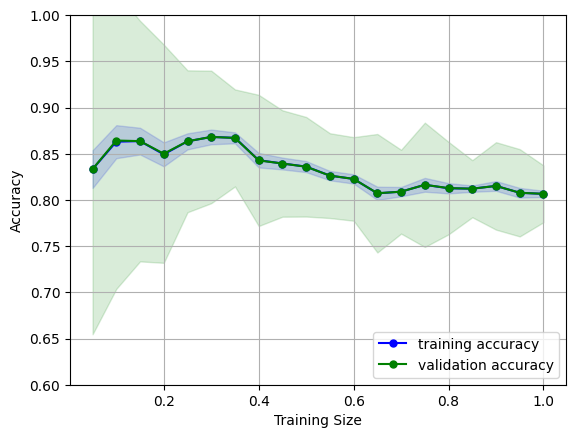

In [84]:
plt.plot(train_size,train_mean,marker='o',color='blue',markersize=5,label='training accuracy')
plt.fill_between(train_size,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_size,test_mean,marker='o',color='green',markersize=5,label='validation accuracy')
plt.fill_between(train_size,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.ylim([0.6,1])
plt.legend(loc='lower right')

From graph above we might have a good model as the gap between the validation accuracy and training accuracy is small which indicates a good bias and variance trade off, thus the model is not overfitting nor underfitting the data 

As you can see, the model performs well on very little training size of 20 percent of the dataset and the performance drops a little as we increase the amount of training set

This signifies reduction in overfitting as we add more training data

### Model Evaluation using Validation curve

In [85]:
from sklearn.model_selection import validation_curve

In [86]:
param_range = list(range(1, 15))
train_scores,test_scores = validation_curve(tree,X_train,y_train,param_name='max_depth',param_range=param_range,
                                       cv=10,scoring='accuracy')

In [87]:
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

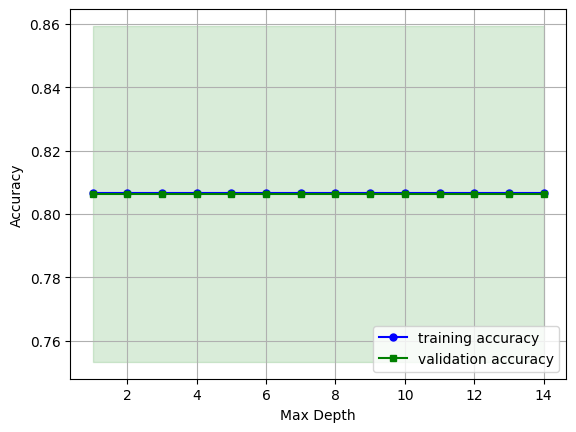

In [88]:
plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
# plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(param_range,test_mean,color='green',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Validation curves are a useful tool for improving the performance of a model by 
addressing issues such as overfitting or underfitting. Validation curves are related to 
learning curves, but instead of plotting the training and test accuracies as functions 
of the sample size, we vary the values of the model parameters

A Max depth of 7 looks like the optimal value

In [89]:
def plot_validation_curve(estimator,X,y,param_name,param_range,cv=10,scoring='accuracy'):
    train_scores,test_scores = validation_curve(estimator,X,y,param_name=param_name,param_range=param_range,
                                       cv=cv,scoring=scoring)
    train_mean = np.mean(train_scores,axis=1)
    train_std = np.std(train_scores,axis=1)
    test_mean = np.mean(test_scores,axis=1)
    test_std = np.std(test_scores,axis=1)
    plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
    plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(param_range,test_mean,color='green',marker='s',markersize=5,label='validation accuracy')
    plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.grid()
    plt.xlabel(param_name.upper())
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

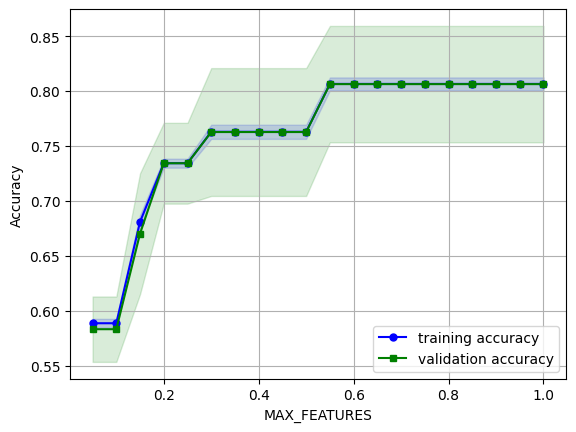

In [90]:
plot_validation_curve(estimator=tree,X=X_train,y=y_train,param_name='max_features',param_range=np.linspace(0.05,1,20),cv=10,scoring='accuracy')

Looking at the graph above, for small values of MAX FEATURES, the model slightly underfits the data, while for large values of the Maximum features, we can see clear overfitting going on here(from 0.8 to 1.0), the most suitable values cut across 0.4-0.6 max feature to avoid overfitting

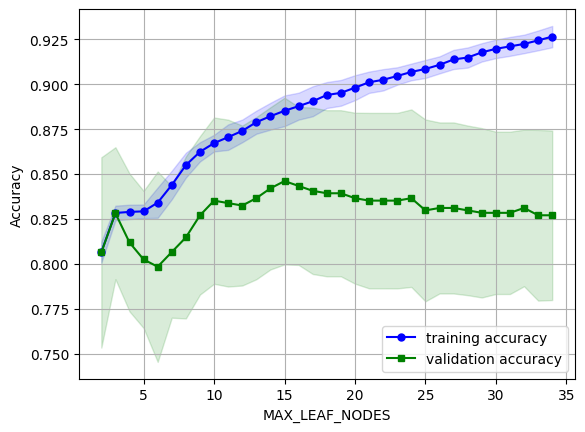

In [91]:
plot_validation_curve(estimator=tree,X=X_train,y=y_train,param_name='max_leaf_nodes',param_range=np.arange(2,35),cv=10,scoring='accuracy')

gs - 2-15

In [92]:
from warnings import filterwarnings
filterwarnings(action='ignore')

In [93]:
pipe_tree = make_pipeline(StandardScaler(),DecisionTreeClassifier())

In [94]:
pipe_tree.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [95]:
pipe_tree.score(X_train,y_train)

1.0

In [96]:
pipe_tree.score(X_test,y_test)

0.75

In [97]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [310]:
param_grid = {'decisiontreeclassifier__max_depth':np.arange(2,15,1),
             'decisiontreeclassifier__criterion':['entropy'],
             'decisiontreeclassifier__max_features':np.arange(.2,.9,0.05),
             'decisiontreeclassifier__max_leaf_nodes':np.arange(3,15,1)}
grid_search = GridSearchCV(estimator=pipe_tree,param_grid=param_grid,scoring='accuracy',cv=15,n_jobs=-1)

In [311]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=15,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(criterion='entropy',
                                                               max_depth=6,
                                                               max_features=0.6,
                                                               max_leaf_nodes=12))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__criterion': ['entropy'],
                         'decisiontreeclassifier__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'decisiontreeclassifier__max_features': array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ,
       0.75, 0.8 , 0.85]),
                         'decisiontreeclassifier__max_leaf_nodes': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='accuracy')

In [312]:
# criterion='entropy', max_depth=6,max_features=0.65,max_leaf_nodes=13

In [313]:
grid_search.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__max_features': 0.7999999999999998,
 'decisiontreeclassifier__max_leaf_nodes': 9}

In [314]:
grid_search.best_score_

0.8446145124716552

In [315]:
pipe_tree = make_pipeline(StandardScaler(),DecisionTreeClassifier())


pipe_tree.set_params(**grid_search.best_params_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        max_features=0.7999999999999998,
                                        max_leaf_nodes=9))])

In [316]:
pipe_tree.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        max_features=0.7999999999999998,
                                        max_leaf_nodes=9))])

In [317]:
pipe_tree.score(X_train,y_train)

0.837874659400545

In [318]:
pipe_tree.score(X_test,y_test)

0.8478260869565217

In [319]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold

In [320]:
kfold =  StratifiedKFold(n_splits=10,shuffle=True,random_state=11).split(X_train,y_train)

In [321]:
scores = []
for i, (train, test) in enumerate(kfold):
    pipe_tree.fit(X_train.iloc[train],y_train.iloc[train])
    score = pipe_tree.score(X_train.iloc[test],y_train.iloc[test])
    scores.append(score)

In [322]:
np.mean(scores)

0.8079600148093299

In [323]:
scores = cross_val_score(pipe_tree,X_train,y=y_train,cv=10,n_jobs=-1)

In [324]:
np.mean(scores), np.std(scores)

(0.8038134024435394, 0.034680481625107284)

In [325]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [326]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_tree,
                                                       X=X_train,
                                                       y=y_train, train_sizes=np.linspace(0.1, 1, 10),
                                                       cv=10, n_jobs=-1)

In [327]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

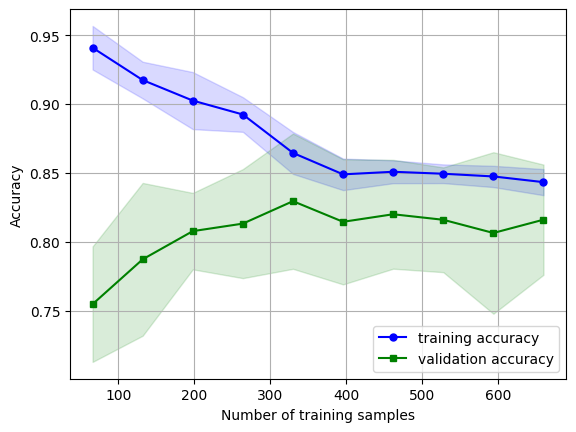

In [328]:
plt.plot(train_sizes, train_mean, color='blue', marker='o',
        markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',
        markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15,
                 color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# plt.ylim([0.8,1.0])

In [329]:
from sklearn.model_selection import GridSearchCV

In [330]:
grid_params =  {
    'svc__C': [0.3],
    'svc__degree': np.arange(1,11),
    'svc__gamma': ['scale', 'auto', np.linspace(0.1,1,10)],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
}

grid_search = GridSearchCV(pipe_svc, grid_params, scoring='accuracy',cv=10,n_jobs=-1)

In [331]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(C=0.38))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.3],
                         'svc__degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'svc__gamma': ['scale', 'auto',
                                        array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                         'precomputed']},
             scoring='accuracy')

In [332]:
print(grid_search.best_params_)

{'svc__C': 0.3, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [333]:
pipe_svc.set_params(**grid_search.best_params_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.3, degree=1))])

In [334]:
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.3, degree=1))])

In [335]:
pipe_svc['svc']

SVC(C=0.3, degree=1)

In [336]:
pipe_svc.score(X_test,y_test)

0.9239130434782609

In [337]:
pipe_svc.score(X_train,y_train)

0.8869209809264306

In [338]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve

In [339]:
pipe_rf = make_pipeline(RandomForestClassifier())
scores = cross_val_score(estimator=pipe_rf,X=X_train,y=y_train,scoring='accuracy',cv=10,n_jobs=-1,)

In [340]:
np.mean(scores)

0.8541281007034431

In [341]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_rf,X=X_train,y=y_train,
                                                      train_sizes=np.linspace(0.05,1,10),cv=10,
                                                       scoring='accuracy',n_jobs=-1,)

In [342]:
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

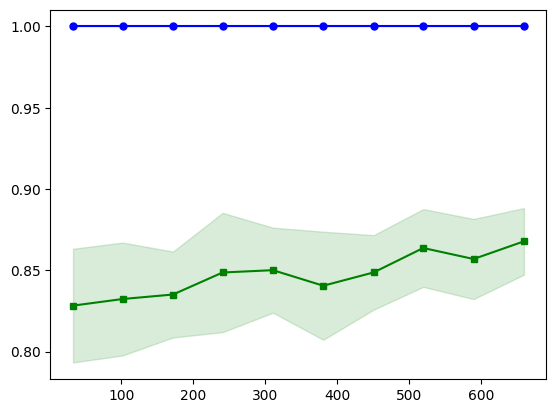

In [343]:
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')

From the learning curve of the random forest algorithm, there is clear overfitting here but also indications that more training set will likely increase the performance of the random forest classifier

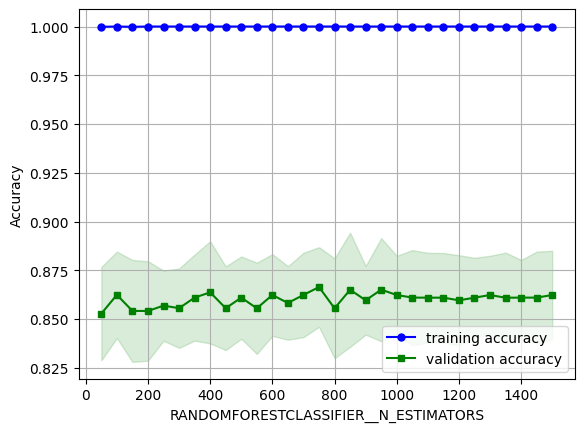

In [344]:
plot_validation_curve(estimator=pipe_rf,X=X_train,y=y_train,param_name='randomforestclassifier__n_estimators',param_range=np.arange(50,1550,50),cv=10)

From the graph above, we have a stable model performance from around 170, 400 estimators to 700 estimators

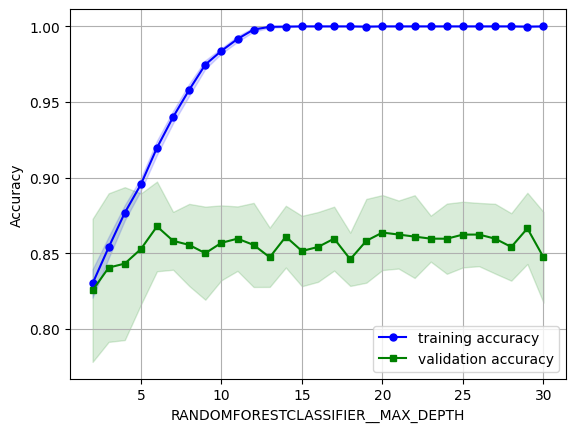

In [345]:
plot_validation_curve(estimator=pipe_rf,X=X_train,y=y_train,param_name='randomforestclassifier__max_depth',param_range=np.arange(2,31,1),cv=10)

From the graph, we have a stable model performance for a max depth of around 5 to 10, 11,13,14,20,24,27,28,29

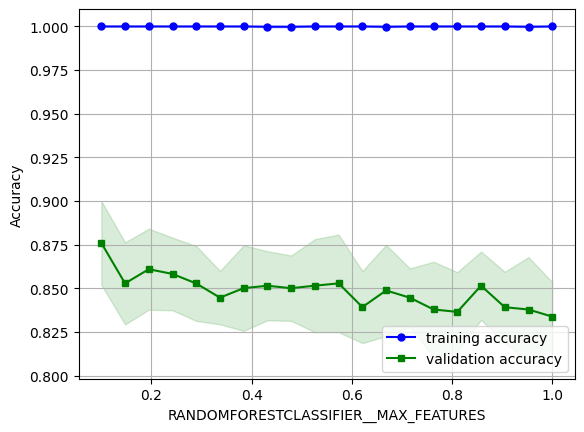

In [346]:
plot_validation_curve(estimator=pipe_rf,X=X_train,y=y_train,param_name='randomforestclassifier__max_features',param_range=np.linspace(0.1,1,20),cv=10)

0.1, 0.15, 0.2, 0.25, 0.3,0.35, 0.4, 0.45, 0.5, 0.55,0.6,0.66,0.95

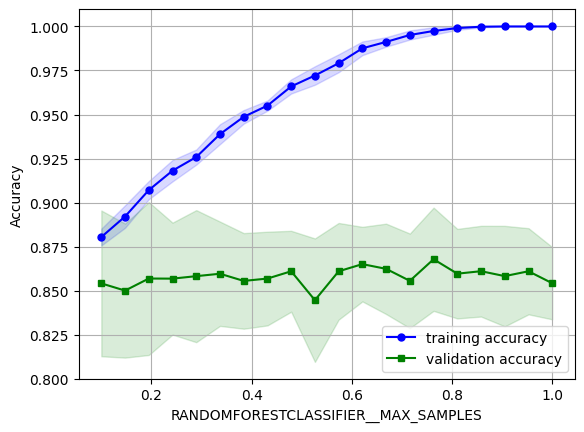

In [347]:
plot_validation_curve(estimator=pipe_rf,X=X_train,y=y_train,param_name='randomforestclassifier__max_samples',param_range=np.linspace(0.1,1,20),cv=10)

Best value between 0.5 and 0.8

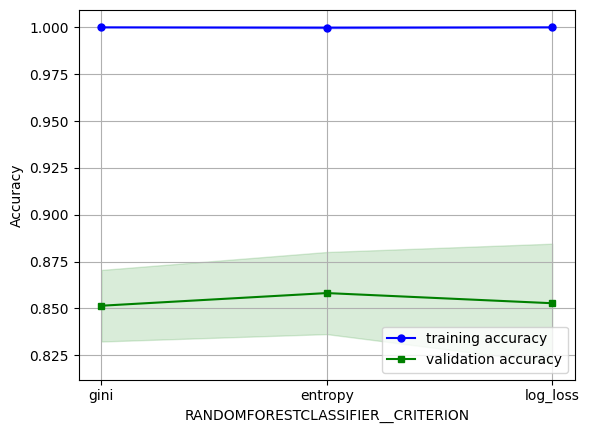

In [348]:
plot_validation_curve(estimator=pipe_rf,X=X_train,y=y_train,param_name='randomforestclassifier__criterion',param_range=["gini", "entropy", "log_loss"],cv=10)

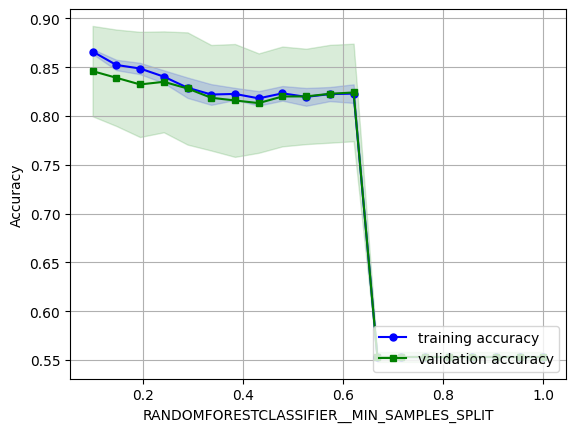

In [349]:
plot_validation_curve(estimator=pipe_rf,X=X_train,y=y_train,param_name='randomforestclassifier__min_samples_split',param_range=np.linspace(0.1,1,20),cv=10)

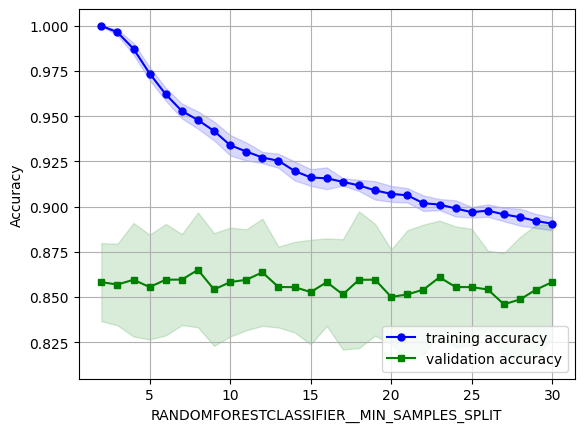

In [350]:
plot_validation_curve(estimator=pipe_rf,X=X_train,y=y_train,param_name='randomforestclassifier__min_samples_split',param_range=np.arange(1,31,1),cv=10)

In [366]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [367]:
np.arange(0.1,0.7,0.05)

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65])

In [395]:
param_grid = {
    'randomforestclassifier__n_estimators': np.append(np.arange(400,900,50),170),  # Number of trees in the forest
    'randomforestclassifier__criterion': ['entropy'],  # Splitting criterion
    'randomforestclassifier__max_depth': [ 5,6,7,8,9,10, 11,13,14,20,24,27,28,29],  # Maximum depth of the tree
    'randomforestclassifier__min_samples_split': np.arange(6,21,1),  # Minimum number of samples required to split an internal node
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'randomforestclassifier__max_features': [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.66,0.95],  # Number of features to consider when looking for the best split
    'randomforestclassifier__max_samples': np.arange(0.45,1,0.05)
}  

grid_search = RandomizedSearchCV(pipe_rf, param_distributions=param_grid,n_iter=1000, scoring='accuracy',n_jobs=-1,random_state=12)

In [396]:
grid_search.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('randomforestclassifier',
                                              RandomForestClassifier(criterion='entropy',
                                                                     max_depth=20,
                                                                     max_features=0.1,
                                                                     max_samples=0.8999999999999999,
                                                                     min_samples_split=9,
                                                                     n_estimators=850))]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'randomforestclassifier__criterion': ['entropy'],
                                        'randomforestclassifier__max_depth': [5,
                                                                              6,
                                                                              7,...
                                        'randomforestclassifier__max_samples': array([0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'randomforestclassifier__min_samples_leaf': [1,
                                                                                     2,
                                                                                     4],
                                        'randomforestclassifier__min_samples_split': array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                                        'randomforestclassifier__n_estimators': array([400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 170])},
                   random_state=12, scoring='accuracy')

In [399]:
grid_search.best_params_

{'randomforestclassifier__n_estimators': 450,
 'randomforestclassifier__min_samples_split': 6,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__max_samples': 0.95,
 'randomforestclassifier__max_features': 0.1,
 'randomforestclassifier__max_depth': 14,
 'randomforestclassifier__criterion': 'entropy'}

In [400]:
grid_search.best_score_

0.8760134190662565

In [401]:
pipe_rf = make_pipeline(RandomForestClassifier())
pipe_rf.set_params(**grid_search.best_params_)
# pipe_rf.set_params(randomforestclassifier__criterion="entropy", randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.1, randomforestclassifier__max_samples=0.55, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=700)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=14,
                                        max_features=0.1, max_samples=0.95,
                                        min_samples_split=6,
                                        n_estimators=450))])

In [402]:
scores = cross_val_score(pipe_rf,X=X_train,y=y_train,scoring='accuracy',cv=15,n_jobs=-1)

In [403]:
np.mean(scores)

0.8678287981859412

In [404]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=14,
                                        max_features=0.1, max_samples=0.95,
                                        min_samples_split=6,
                                        n_estimators=450))])

In [405]:
pipe_rf.score(X_train,y_train)

0.9536784741144414

In [406]:
pipe_rf.score(X_test,y_test)

0.907608695652174

randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.1, randomforestclassifier__max_samples=0.55, randomforestclassifier__min_samples_leaf=1, 
randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=450;, score=0.905

randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.1, randomforestclassifier__max_samples=0.55, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=400;, score=0.912

randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.1, randomforestclassifier__max_samples=0.55, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=700;, score=0.912

In [407]:
import pickle
import os

In [412]:
dest = os.path.join('research/', 'model_pipelines')
if not os.path.exists(dest):
    os.makedirs(dest)

In [420]:
pickle.dump(pipe_lr,
            open(os.path.join(dest,'log_reg_pipeline.pkl'),'wb'),
            protocol=4)
pickle.dump(pipe_tree,
            open(os.path.join(dest,'tree_pipeline.pkl'),'wb'),
            protocol=4)
pickle.dump(pipe_svc,
            open(os.path.join(dest,'svc_pipeline.pkl'),'wb'),
            protocol=4)
pickle.dump(pipe_rf,
            open(os.path.join(dest,'rf_pipeline.pkl'),'wb'),
            protocol=4)